In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.head(133)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
128,15722758,Male,30,17000,0
129,15792102,Female,26,84000,0
130,15675185,Male,31,58000,0
131,15801247,Male,33,31000,0


In [4]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [6]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [7]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_= sc.fit_transform(X_train)
X_test_= sc.transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy'],
              'max_features': ['auto','sqrt','log2'],
              'n_estimators':[10,100]} 

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1') 
   
# fitting the model for grid search 
grid.fit(X_train_, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrai

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100]},
             scoring='f1', verbose=3)

In [11]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test_) 
   
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)

# print classification report 
from sklearn.metrics import classification_report,accuracy_score
clf_report = classification_report(y_test, grid_predictions)

In [13]:
print(grid.best_params_)

{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}


In [12]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001126,0.000332,0.000000,0.000000,gini,auto,10,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
1,0.001728,0.000904,0.000000,0.000000,gini,auto,100,"{'criterion': 'gini', 'max_features': 'auto', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,0.030003,0.004865,0.006914,0.001511,gini,sqrt,10,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000,0.820513,0.750000,0.871795,0.918919,0.832245,0.058341,6
3,0.216970,0.017806,0.010866,0.001169,gini,sqrt,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.727273,0.842105,0.809524,0.900000,0.947368,0.845254,0.075671,2
4,0.023820,0.002305,0.006625,0.004298,gini,log2,10,"{'criterion': 'gini', 'max_features': 'log2', ...",0.687500,0.789474,0.780488,0.842105,0.918919,0.803697,0.076150,8
5,0.206117,0.002468,0.011831,0.002858,gini,log2,100,"{'criterion': 'gini', 'max_features': 'log2', ...",0.764706,0.820513,0.809524,0.900000,0.923077,0.843564,0.059019,4
6,0.000803,0.000402,0.000000,0.000000,entropy,auto,10,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.000401,0.000492,0.000000,0.000000,entropy,auto,100,"{'criterion': 'entropy', 'max_features': 'auto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
8,0.021574,0.001805,0.003592,0.000471,entropy,sqrt,10,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.750000,0.842105,0.780488,0.871795,0.972973,0.843472,0.077818,5
9,0.197400,0.004256,0.010251,0.000749,entropy,sqrt,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.800000,0.842105,0.809524,0.900000,0.923077,0.854941,0.048824,1


In [13]:
from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)

The f1_macro value for best parameter {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}: 0.9256751954513149


In [14]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[79  6]
 [ 4 45]]


In [15]:
print("The report:\n",clf_report)
accuracy=accuracy_score(y_test,grid_predictions)
print("Accuracy score is: ",accuracy)

The report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        85
           1       0.88      0.92      0.90        49

    accuracy                           0.93       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.93      0.93      0.93       134

Accuracy score is:  0.9253731343283582


In [16]:
table_pr=pd.DataFrame()

In [17]:
print(X_test)

     Age  EstimatedSalary  Gender_Male
132   30            87000         True
309   38            50000        False
341   35            75000         True
196   30            79000        False
246   35            50000        False
..   ...              ...          ...
168   29           148000         True
150   26            15000        False
393   60            42000         True
66    24            19000         True
240   42           149000         True

[134 rows x 3 columns]


In [19]:
table_pr.head(134)

""


In [20]:
table_pr['Age']=X_test["Age"]
table_pr['Gender_male']=X_test["Gender_Male"]
table_pr['Estimated_Salary']=X_test["EstimatedSalary"]
table_pr['Actual']=y_test
table_pr['Predicted']=grid_predictions

In [21]:
table_pr.head(134)


,Age,Gender_male,Estimated_Salary,Actual,Predicted
132,30,True,87000,0,0
309,38,False,50000,0,0
341,35,True,75000,0,0
196,30,False,79000,0,0
246,35,False,50000,0,0
...,...,...,...,...,...
168,29,True,148000,1,1
150,26,False,15000,0,0
393,60,True,42000,1,1
66,24,True,19000,0,0


In [22]:
table_pr.to_csv("cm.csv",index=False)

In [26]:
#dataset['']
#dataset['Predicted']=grid_predictions
table_pr['Predicted']=grid_predictions
print(table_pr)

     Age  Gender_male  Estimated_Salary  Actual  Predicted
132   30         True             87000       0          0
309   38        False             50000       0          0
341   35         True             75000       0          0
196   30        False             79000       0          0
246   35        False             50000       0          0
..   ...          ...               ...     ...        ...
168   29         True            148000       1          1
150   26        False             15000       0          0
393   60         True             42000       1          1
66    24         True             19000       0          0
240   42         True            149000       1          1

[134 rows x 5 columns]


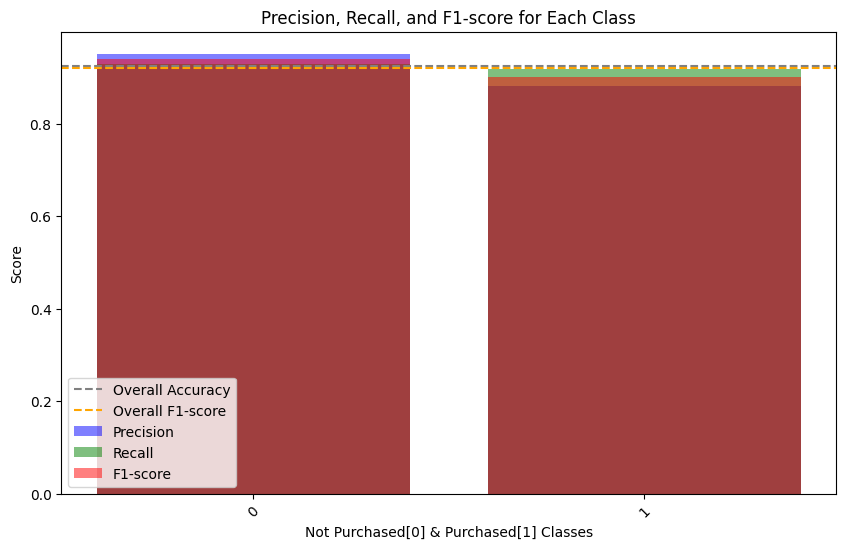

In [28]:
report = classification_report(y_test, grid_predictions, output_dict=True)

# Overall accuracy and F1-score
overall_accuracy = report['accuracy']
overall_f1_score = report['macro avg']['f1-score']

# Extract class-wise precision, recall, and F1-score
class_names = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
class_precision = [report[class_name]['precision'] for class_name in class_names]
class_recall = [report[class_name]['recall'] for class_name in class_names]
class_f1_score = [report[class_name]['f1-score'] for class_name in class_names]

# Plot graph for true class accuracy score and F1-score
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_precision, color='blue', alpha=0.5, label='Precision')
plt.bar(class_names, class_recall, color='green', alpha=0.5, label='Recall')
plt.bar(class_names, class_f1_score, color='red', alpha=0.5, label='F1-score')
plt.axhline(y=overall_accuracy, color='gray', linestyle='--', label='Overall Accuracy')
plt.axhline(y=overall_f1_score, color='orange', linestyle='--', label='Overall F1-score')
plt.xlabel('Not Purchased[0] & Purchased[1] Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Class')
plt.xticks(rotation=45)
plt.legend()
plt.show()